In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Menggunakan perintah pip untuk menginstal paket 'pyrsgis' dari Python Package Index (PyPI)
# 'pyrsgis' adalah sebuah paket Python yang digunakan untuk memproses data penginderaan jauh (remote sensing)
!pip install pyrsgis

In [3]:
# Menggunakan perintah pip untuk menginstal paket 'imagecodecs' dari Python Package Index (PyPI)
# 'imagecodecs' adalah sebuah paket Python yang menyediakan codec untuk membaca dan menulis berbagai format gambar,
# termasuk format gambar kompresi seperti PNG, JPEG, TIFF, dan lainnya.

!pip install imagecodecs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 27.6 MB/s eta 0:00:00


# Import Library

In [4]:
# Mengimpor paket-paket yang diperlukan
# MaxPooling2D, Conv2D, Dropout, Flatten, Dense: Lapisan-lapisan inti untuk membangun jaringan saraf konvolusional (CNN)
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense
# Sequential: Struktur model yang disederhanakan di Keras untuk menumpuk lapisan-lapisan secara berurutan
from tensorflow.keras.models import Sequential
# LabelEncoder: Mengkodekan label kategori menjadi bilangan bulat untuk model machine learning
from sklearn.preprocessing import LabelEncoder
# to_categorical: Mengonversi label bilangan bulat menjadi vektor one-hot encoding
from tensorflow.keras.utils import to_categorical
# train_test_split: Membagi dataset menjadi subset training dan testing
from sklearn.model_selection import train_test_split
# tqdm.notebook: Menampilkan progress bar pada Jupyter notebook
from tqdm.notebook import tqdm
# imread: Membaca file gambar TIFF
from tifffile import imread
# matplotlib.pyplot: Digunakan untuk membuat visualisasi dan plot grafik
import matplotlib.pyplot as plt
# paths: Utilitas untuk menangani jalur file
from imutils import paths
# numpy: Paket utama untuk komputasi numerik
import numpy as np
# os: Menyediakan fungsionalitas yang bergantung pada sistem operasi
import os
# cv2: Library OpenCV untuk pemrosesan gambar
import cv2
# tqdm: Menampilkan progress bar untuk iterasi loop
from tqdm import tqdm
# Image: Modul PIL untuk menangani operasi gambar
from PIL import Image
# paths (diimpor ulang): Kemungkinan digunakan untuk menangani jalur file gambar; sudah diimpor di atas
from imutils import paths


# Load Dataset

In [5]:
# Mengambil daftar gambar dalam direktori dataset menggunakan fungsi list_images dari library 'imutils'
folder_path = list(paths.list_images('/content/drive/MyDrive/Skripsi/AfterSemhas/DatasetAfterSemhas'))
data = []  # Menyimpan gambar yang telah diproses
labels = []  # Menyimpan label kelas untuk setiap gambar

# Melakukan iterasi melalui setiap path gambar dalam folder
for folder_path in tqdm(folder_path, desc="Importing images"):
    # Mengekstrak label kelas dari nama folder (folder kedua dari belakang)
    label = folder_path.split(os.path.sep)[-2]

    # Membuka gambar dengan PIL (Pillow) dan mengonversinya ke format RGB
    image = Image.open(folder_path).convert("RGB")

    # Mengubah ukuran gambar menjadi 224x224 piksel
    image = image.resize((75, 75))

    # Mengonversi gambar menjadi array NumPy
    image = np.array(image)

    # Menambahkan gambar dan label ke dalam daftar data dan labels
    data.append(image)
    labels.append(label)

# Mengonversi data dan labels menjadi array NumPy dengan tipe data float32 untuk kompatibilitas dalam pelatihan model
data = np.array(data, dtype="float64")
labels = np.array(labels)

# Menampilkan label yang unik dalam dataset
print(np.unique(labels))

Importing images: 100%|██████████| 1000/1000 [03:52<00:00,  4.31it/s]

['Hutan' 'Non-Hutan']


# Split Dataset

In [6]:
# perform one-hot encoding on the labels
enc = LabelEncoder().fit(labels)
encoded_labels = enc.transform(labels)

# Transpose the features to "float32" format
data_features = np.array(data, dtype="float32")

# Partition the data into 70% train, 30% temp (validation + test)
trainX, tempX, trainY, tempY = train_test_split(
    data_features, encoded_labels, test_size=0.30, stratify=encoded_labels, random_state=42
)

# Split the temp set (30%) into 20% validation and 10% test
valX, testX, valY, testY = train_test_split(
    tempX, tempY, test_size=0.333, stratify=tempY, random_state=42
)

In [7]:
# Menampilkan ringkasan dataset yang telah dimuat dan dibagi
# Menampilkan bentuk (shape) dari data fitur (X) dan label (y) untuk set pelatihan, validasi, dan pengujian
print('Train set: X=%s, y=%s' % (trainX.shape, trainY.shape))  # Menampilkan dimensi fitur dan label untuk training set
print('Validation set: X=%s, y=%s' % (valX.shape, valY.shape))  # Menampilkan dimensi fitur dan label untuk validation set
print('Test set: X=%s, y=%s' % (testX.shape, testY.shape))  # Menampilkan dimensi fitur dan label untuk test set

# Menemukan angka unik yang ada pada label training
# `np.unique(trainY)` mengembalikan nilai unik dari label dalam set pelatihan
classes = np.unique(trainY)

# Menghitung jumlah kelas (kategori) unik dalam dataset pelatihan
nClasses = len(classes)

# Menampilkan daftar kelas (kategori) yang unik dan jumlah total kelas dalam dataset
print('Output classes:', classes)  # Menampilkan kelas-kelas unik yang ada di training set
print('Total number of output classes:', nClasses)  # Menampilkan total jumlah kelas yang unik

Train set: X=(700, 75, 75, 3), y=(700,)
Validation set: X=(200, 75, 75, 3), y=(200,)
Test set: X=(100, 75, 75, 3), y=(100,)
Output classes: [0 1]
Total number of output classes: 2


In [8]:
from tensorflow.keras.utils import to_categorical

# Ubah label ke One-Hot Encoding
trainY = to_categorical(trainY, num_classes=2)
valY = to_categorical(valY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

print("Contoh label setelah One-Hot Encoding:\n", trainY[:10])


Contoh label setelah One-Hot Encoding:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Plot Data

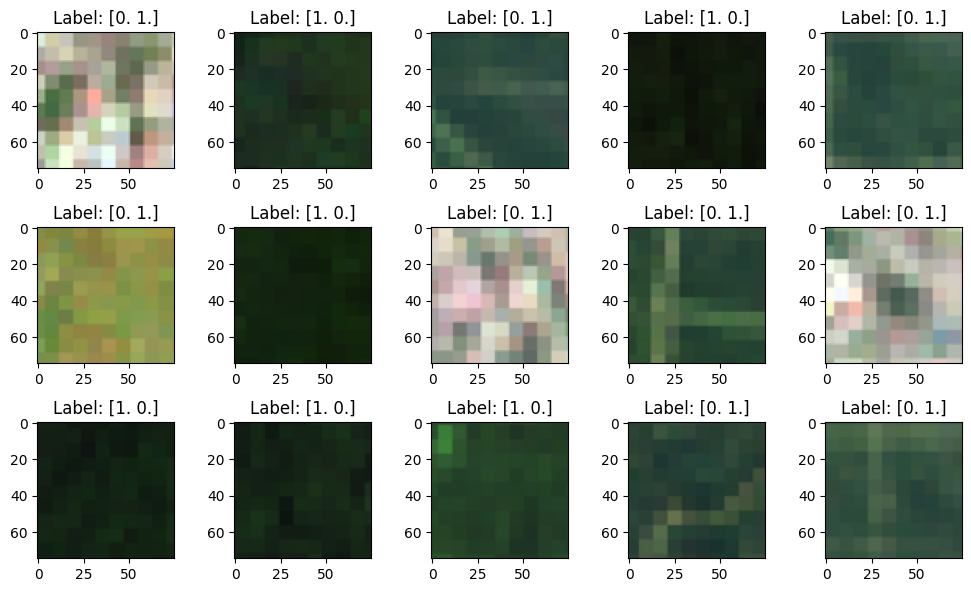

In [9]:
# Menentukan jumlah baris dan kolom untuk plot gambar
num_row = 3  # Jumlah baris gambar yang akan ditampilkan
num_col = 5  # Jumlah kolom gambar yang akan ditampilkan

# Membuat figure dan axes untuk plot, menggunakan subplots dari matplotlib
# figsize menentukan ukuran total figure yang akan dibuat
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))

# Loop untuk menampilkan 15 gambar pertama dari dataset pelatihan
for i in range(15):
    # Menentukan subplot untuk setiap gambar (baris dan kolom)
    ax = axes[i // num_col, i % num_col]

    # Menampilkan gambar mentah dari array trainX, dengan konversi tipe data ke 'uint8'
    # untuk memastikan gambar dapat ditampilkan dengan benar (dalam rentang 0-255)
    ax.imshow(trainX[i].astype('uint8'))

    # Menambahkan judul pada setiap subplot yang menampilkan label dari gambar tersebut
    ax.set_title("Label: {}".format(trainY[i]))

# Mengatur tata letak gambar agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan figure yang telah dibuat
plt.show()

# AUGMENTASI

In [10]:
# Mengimpor kelas ImageDataGenerator dari Keras untuk augmentasi data gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat objek ImageDataGenerator untuk augmentasi gambar pada training set
train_datagen = ImageDataGenerator(
    rotation_range=20,            # Rotasi gambar secara acak antara -20 hingga +20 derajat
    width_shift_range=0.2,        # Geser gambar secara horizontal hingga 20% dari lebar gambar
    height_shift_range=0.2,       # Geser gambar secara vertikal hingga 20% dari tinggi gambar
    shear_range=0.2,              # Terapkan transformasi shearing (distorsi geser) secara acak
    zoom_range=0.2,               # Zoom in atau zoom out gambar secara acak hingga 20%
    horizontal_flip=True,         # Pembalikan gambar secara horizontal secara acak
    fill_mode='nearest'           # Metode pengisian piksel yang hilang setelah transformasi (menggunakan piksel terdekat)
)

# Membuat objek ImageDataGenerator untuk validasi set yang hanya melakukan rescaling tanpa augmentasi
val_datagen = ImageDataGenerator()

# Membuat generator data untuk training set dengan augmentasi
# `batch_size=64` berarti setiap iterasi menghasilkan 64 gambar per batch
train_data = train_datagen.flow(trainX, trainY, batch_size=64)

# Membuat generator data untuk validation set tanpa augmentasi, hanya rescaling
val_data = val_datagen.flow(valX, valY, batch_size=64)

# Arsitektur Model

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
import time

# Base Model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(75, 75, 3))
base_model.trainable = False

# Input Layer
input_tensor = Input(shape=(75, 75, 3))

# Adding Base Model and Custom Layers
x = base_model(input_tensor)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
output_tensor = Dense(2, activation='softmax')(x)

# Model Definition
model_ResNet50 = Model(inputs=input_tensor, outputs=output_tensor)

# Compile Model
model_ResNet50.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print Model Summary
model_ResNet50.summary()

# ================================
# START TRAINING WITH TIME TRACKING
# ================================
epochs = 50

print("\nMemulai pelatihan model ResNet50...\n")
start_time = time.time()

history = model_ResNet50.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

end_time = time.time()
training_time = end_time - start_time
minutes = int(training_time // 60)
seconds = int(training_time % 60)
average_epoch_time = training_time / epochs

print(f"\nWaktu total pelatihan: {minutes} menit {seconds} detik")
print(f"Rata-rata waktu per epoch: {average_epoch_time:.2f} detik")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 75, 75, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 3, 3, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,854,818 (91.00 MB)

 Trainable params: 266,786 (1.02 MB)

 Non-trainable params: 23,588,032 (89.98 MB)


Memulai pelatihan model ResNet50...

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5171 - loss: 0.9246 - val_accuracy: 0.6050 - val_loss: 0.6565
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.6293 - loss: 0.7127 - val_accuracy: 0.7450 - val_loss: 0.4939
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.7270 - loss: 0.5342 - val_accuracy: 0.7850 - val_loss: 0.4097
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7672 - loss: 0.5175 - val_accuracy: 0.8350 - val_loss: 0.3474
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.7948 - loss: 0.4339 - val_accuracy: 0.8550 - val_loss: 0.3098
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.8187 - loss: 0.4080 - val_accuracy: 0.8950 - val_loss: 0.2720
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8691 - loss: 0.3553 - val_accuracy: 0.9000 - val_loss: 0.2480
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8603 - loss: 0.3336 - val_accuracy: 0.9100 - val_l

In [12]:
test_loss, test_accuracy = model_ResNet50.evaluate(testX, testY) # Pass testX (image data) along with testY (labels)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 980ms/step - accuracy: 0.9693 - loss: 0.0663
Test Accuracy: 0.9700000286102295, Test Loss: 0.06441188603639603


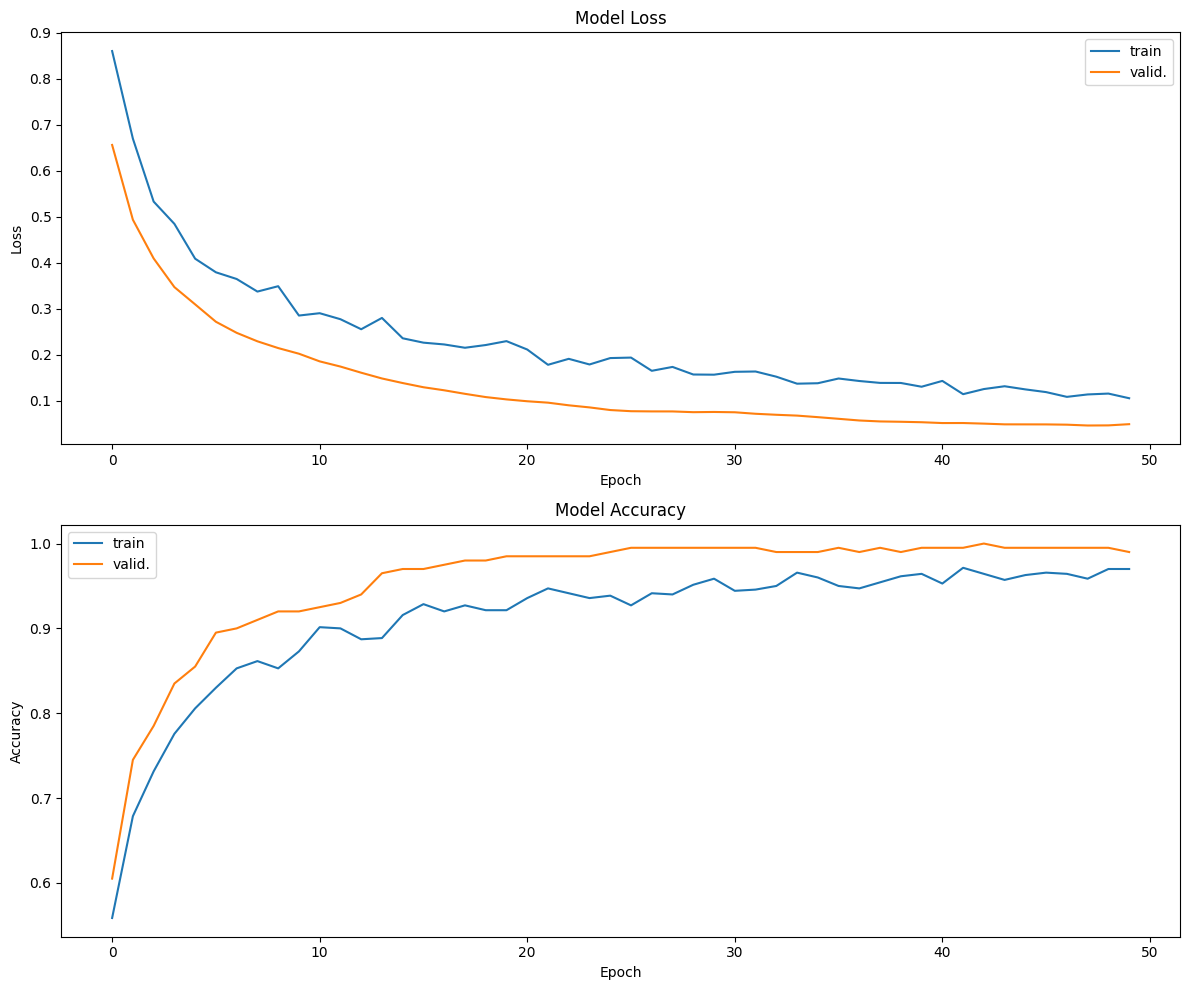

In [13]:
# Mengimpor library matplotlib.pyplot untuk membuat plot
import matplotlib.pyplot as plt

# Fungsi untuk mem-plot training dan validation accuracy serta loss
def plot_training(history):
    # Menentukan ukuran figure untuk plot
    plt.figure(figsize=(12, 10))

    # Plot Loss (Kerugian)
    plt.subplot(2, 1, 1)  # Membuat subplot pada posisi baris 1, kolom 1
    plt.plot(history.history['loss'], label='train')  # Plot loss pada data training
    plt.plot(history.history['val_loss'], label='valid.')  # Plot loss pada data validasi
    plt.title('Model Loss')  # Judul plot untuk loss
    plt.ylabel('Loss')  # Label sumbu Y untuk loss
    plt.xlabel('Epoch')  # Label sumbu X untuk epoch
    plt.legend()  # Menampilkan legenda untuk plot

    # Plot Accuracy
    plt.subplot(2, 1, 2)  # Membuat subplot pada posisi baris 2, kolom 1
    plt.plot(history.history['accuracy'], label='train')  # Plot akurasi pada data training
    plt.plot(history.history['val_accuracy'], label='valid.')  # Plot akurasi pada data validasi
    plt.title('Model Accuracy')  # Judul plot untuk akurasi
    plt.ylabel('Accuracy')  # Label sumbu Y untuk akurasi
    plt.xlabel('Epoch')  # Label sumbu X untuk epoch
    plt.legend()  # Menampilkan legenda untuk plot

    plt.tight_layout()  # Menyusun tata letak plot agar tidak tumpang tindih
    plt.show()  # Menampilkan plot

# Memanggil fungsi untuk menampilkan plot training history
plot_training(history)

# Evaluasi Model

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


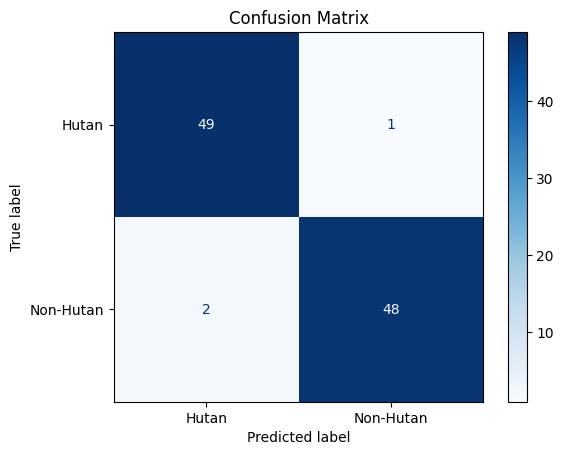

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Mengimpor fungsi untuk confusion matrix
import matplotlib.pyplot as plt  # Mengimpor library untuk visualisasi
import numpy as np  # Mengimpor numpy untuk operasi numerik

# Prediksi data uji
predictions = model_ResNet50.predict(testX)  # Menggunakan model untuk memprediksi data uji (testX)

# Mengambil prediksi label dengan memilih label dengan probabilitas tertinggi (softmax)
y_pred = np.argmax(predictions, axis=1)  # Mengambil label dengan probabilitas tertinggi dari output softma

# Mengubah y_true ke format single-digit labels
y_true = np.argmax(testY, axis=1)  # Mengambil label dengan probabilitas tertinggi dari output softmax

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)  # Menghitung confusion matrix antara label asli dan prediksi

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Hutan', 'Non-Hutan'])  # Membuat objek untuk menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d')  # Menampilkan confusion matrix dengan format warna biru dan angka di dalam setiap kotak
plt.title("Confusion Matrix")  # Memberikan judul pada grafik
plt.show()  # Menampilkan grafik


In [15]:
from sklearn.metrics import classification_report  # Mengimpor fungsi untuk evaluasi klasifikasi

# Prediksi data uji (test set)
predictions = model_ResNet50.predict(testX)  # Menggunakan model untuk memprediksi data uji (testX)

# Mengambil prediksi label dengan memilih label dengan probabilitas tertinggi (softmax)
y_pred = np.argmax(predictions, axis=1)  # Mengambil label dengan probabilitas tertinggi dari output softmax

y_true = np.argmax(testY, axis=1)  # Label asli dari data uji

# Membuat classification report yang berisi precision, recall, f1-score, dan support
report = classification_report(y_true, y_pred, target_names=['Hutan', 'Non-Hutan'])

# Menampilkan classification report
print("Classification Report:")
print(report)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classification Report:
              precision    recall  f1-score   support

       Hutan       0.96      0.98      0.97        50
   Non-Hutan       0.98      0.96      0.97        50

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



# Test

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_images(testX, y_true, y_pred, class_names, num_images=15):
    """
    1) Pilih 'num_images' data secara acak dari testX, y_true, y_pred
    2) Tampilkan (plot) gambar-gambar tersebut
    """
    # -- A. Buat indeks acak --
    indices = np.random.permutation(len(testX))[:num_images]

    # -- B. Ambil subset data --
    random_testX = testX[indices]
    random_y_true = y_true[indices]
    random_y_pred = y_pred[indices]

    # -- C. KONVERSI data agar sesuai rentang valid Matplotlib --
    # Misal: data float32 di [0..255] -> convert ke [0..255] uint8
    random_testX_uint8 = np.clip(random_testX, 0, 255).astype(np.uint8)

    # -- D. Plotting --
    plt.figure(figsize=(15, 5))  # bebas menyesuaikan
    for i in range(num_images):
        plt.subplot(3, 5, i + 1)  # 3 baris x 5 kolom
        plt.imshow(random_testX_uint8[i])

        color = 'green' if random_y_true[i] == random_y_pred[i] else 'red'
        plt.title(
            f"Pred: {class_names[random_y_pred[i]]}\n"
            f"True: {class_names[random_y_true[i]]}",
            color=color
        )
        plt.axis('off')

    plt.tight_layout()
    plt.show()


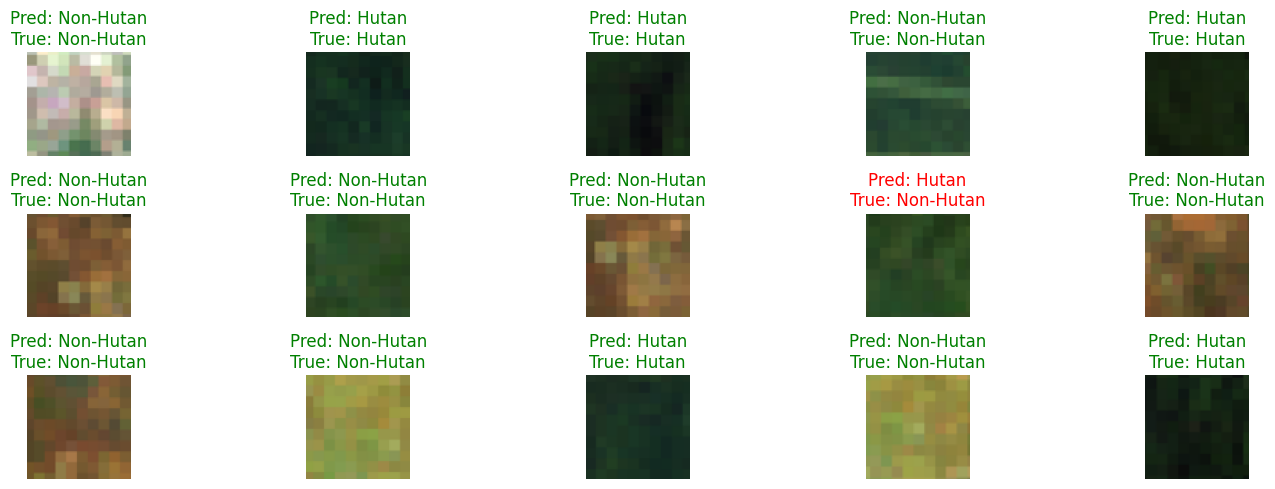

In [17]:
class_names=['Hutan', 'Non-Hutan']
plot_random_images(
    testX=testX,
    y_true=y_true,
    y_pred=y_pred,
    class_names=class_names,
    num_images=15
)

# Pengujian Data Baru

In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path ke folder test
test_folder = '/content/drive/MyDrive/Skripsi/DatasetFix/Non-Hutan'  # Ganti dengan folder yang benar

# Membaca semua gambar dalam folder
test_images = []
image_names = []  # Menyimpan nama gambar untuk referensi

for file_name in os.listdir(test_folder):
    # Buat path lengkap untuk setiap gambar
    img_path = os.path.join(test_folder, file_name)

    # Pastikan file adalah gambar
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        try:
            # Load gambar dan ubah ukurannya sesuai input model
            img = load_img(img_path, target_size=(75, 75))

            # Ubah gambar menjadi array NumPy
            img_array = img_to_array(img)

            # Tambahkan dimensi batch (batch_size, height, width, channels)
            img_array = np.expand_dims(img_array, axis=0)

            # Simpan ke daftar
            test_images.append(img_array)
            image_names.append(file_name)

        except Exception as e:
            print(f"Error memproses gambar {file_name}: {e}")

# Konversi daftar ke array NumPy
test_images = np.vstack(test_images)  # Gabungkan semua gambar ke satu array

print(f"Jumlah gambar yang diproses: {len(test_images)}")


Jumlah gambar yang diproses: 500


In [19]:
# Use model for prediction
predictions = model_ResNet50.predict(test_images)

# Get predicted class labels from probabilities
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability

class_labels = ["Hutan", "Non-Hutan"]
for i, label in enumerate(predicted_classes):  # Use 'predicted_classes' here
    print(f"Gambar: {image_names[i]} → Prediksi: {class_labels[label]}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step
Gambar: NH101.tiff → Prediksi: Non-Hutan
Gambar: NH102.tiff → Prediksi: Non-Hutan
Gambar: NH103.tiff → Prediksi: Non-Hutan
Gambar: NH112.tiff → Prediksi: Non-Hutan
Gambar: NH114.tiff → Prediksi: Non-Hutan
Gambar: NH119.tiff → Prediksi: Non-Hutan
Gambar: NH120.tiff → Prediksi: Non-Hutan
Gambar: NH149.tiff → Prediksi: Non-Hutan
Gambar: NH150.tiff → Prediksi: Non-Hutan
Gambar: NH62.tiff → Prediksi: Non-Hutan
Gambar: NH63.tiff → Prediksi: Non-Hutan
Gambar: NH64.tiff → Prediksi: Non-Hutan
Gambar: NH65.tiff → Prediksi: Non-Hutan
Gambar: NH66.tiff → Prediksi: Non-Hutan
Gambar: NH67.tiff → Prediksi: Non-Hutan
Gambar: NH68.tiff → Prediksi: Non-Hutan
Gambar: NH69.tiff → Prediksi: Non-Hutan
Gambar: NH70.tiff → Prediksi: Non-Hutan
Gambar: NH71.tiff → Prediksi: Non-Hutan
Gambar: NH72.tiff → Prediksi: Non-Hutan
Gambar: NH73.tiff → Prediksi: Non-Hutan
Gambar: NH74.tiff → Prediksi: Non-Hutan
Gambar: NH75.tiff → Prediksi: Non-Hutan
Gambar: NH76.tiff → Prediksi: 

# Save Model

In [20]:
# Menyimpan model
model_ResNet50.save("/content/drive/MyDrive/Skripsi/AfterSemhas/ModelRevisi/Fix96Resnet50(50)Revisi.h5")

# # Menampilkan konfirmasi
print("Model berhasil disimpan sebagai Fix96Resnet50(50)Revisi.h5")

Model berhasil disimpan sebagai Fix96Resnet50(50)Revisi.h5
